### Importing Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud

### Reading Dataset

The Dataset contains 2000 reviews for the British Airways from the skytrax website.

In [80]:
df = pd.read_csv("/kaggle/input/british-airways-reviews/BA_reviews.csv")

In [81]:
df.shape

(2000, 2)

We have over 2000 reviews.

In [82]:
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | I booked our first out of c...
1,1,✅ Trip Verified | My husband and I booked seat...
2,2,"Not Verified | May 3, flew from Seattle to He..."
3,3,✅ Trip Verified | I went through three flights...
4,4,✅ Trip Verified | An excellent flight in Club ...


Removing "✅ Trip Verified |" and "Not Verified |"

In [83]:
new_reviews = []
for i in df['reviews']:
    if len(i.split('|'))==2:
        new_reviews.append(i.split('|')[1])
    else :
        new_reviews.append(i)

In [84]:
df["reviews"] = new_reviews

In [85]:
df.head()

,Unnamed: 0,reviews
0,0,I booked our first out of country trip to ta...
1,1,My husband and I booked seats within our prem...
2,2,"May 3, flew from Seattle to Heathrow then to..."
3,3,I went through three flights to reach my dest...
4,4,An excellent flight in Club World on British ...


Dropping the unnamed column. Having the reviews column only.

In [86]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [87]:
df.head()

,reviews
0,I booked our first out of country trip to ta...
1,My husband and I booked seats within our prem...
2,"May 3, flew from Seattle to Heathrow then to..."
3,I went through three flights to reach my dest...
4,An excellent flight in Club World on British ...


In [88]:
data = df.copy()

### Visualising Length

In [89]:
data['len'] = data.reviews.apply(len)
data.head()

,reviews,len
0,I booked our first out of country trip to ta...,2504
1,My husband and I booked seats within our prem...,473
2,"May 3, flew from Seattle to Heathrow then to...",854
3,I went through three flights to reach my dest...,1193
4,An excellent flight in Club World on British ...,595


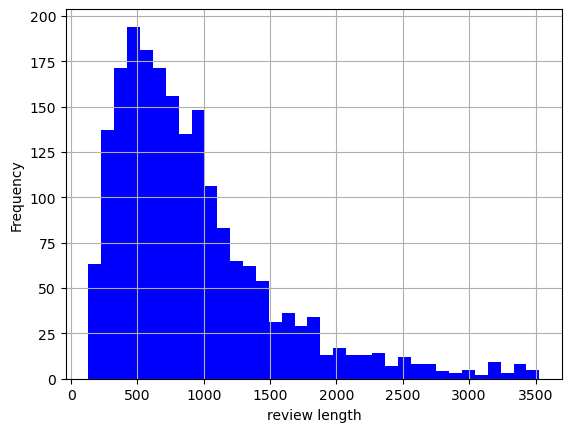

In [90]:
data.len.plot(bins=35, kind='hist',color='blue')
plt.xlabel("review length")
plt.grid(visible=True)
plt.show()

In [91]:
data['words'] = data.reviews.apply(lambda x: len(x.split()))
data.head()

,reviews,len,words
0,I booked our first out of country trip to ta...,2504,464
1,My husband and I booked seats within our prem...,473,89
2,"May 3, flew from Seattle to Heathrow then to...",854,145
3,I went through three flights to reach my dest...,1193,215
4,An excellent flight in Club World on British ...,595,101


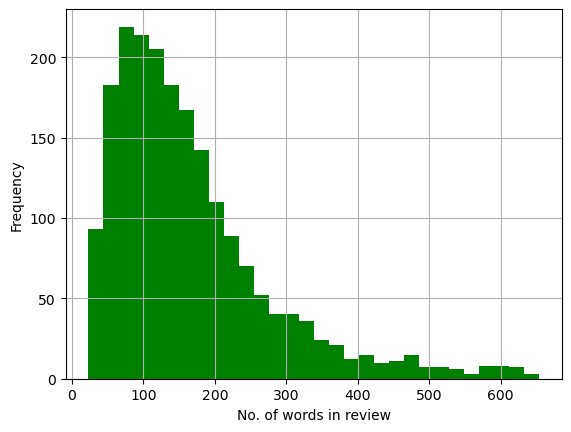

In [92]:
data.words.plot(bins=30, kind='hist',color='green')
plt.xlabel("No. of words in review")
plt.grid(visible=True)
plt.show()

More than 10% of the reviews had around 80 words.

### Word Clouds

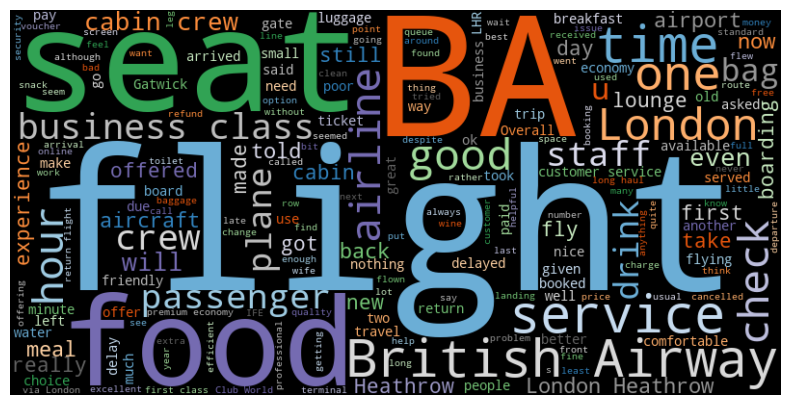

In [93]:
wordcloud = WordCloud(background_color='black',
                      colormap='tab20c',font_path=None,width=800,
                      height=400).generate(''.join(data.reviews))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [94]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

Word cloud masked onto a flight image. (since its british "airways")

In [95]:
mask = np.array(Image.open('/kaggle/input/british-airways-image/logo.jpg'))

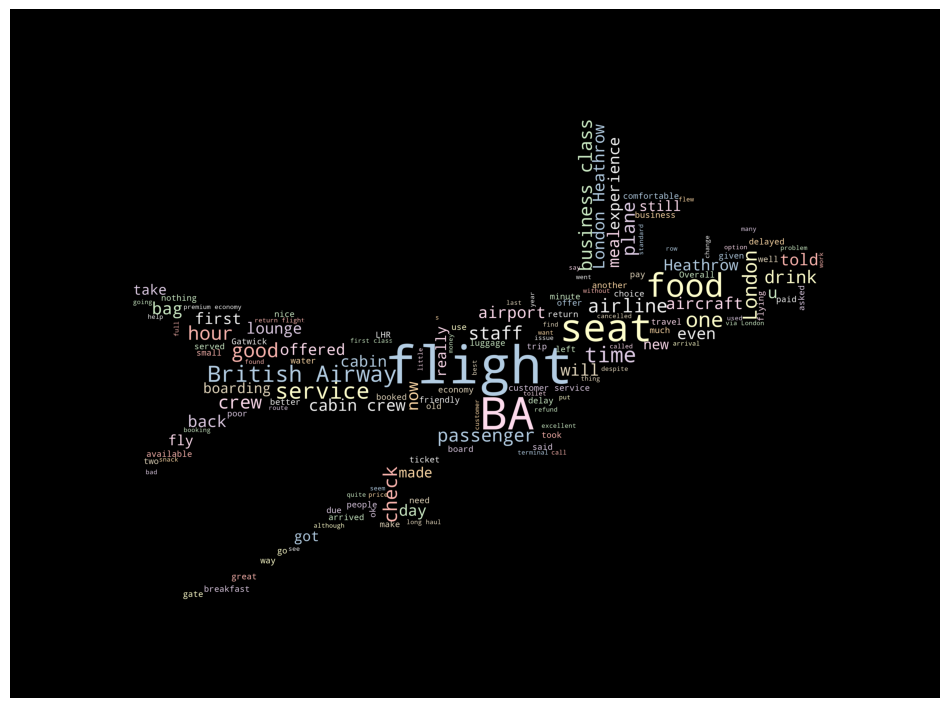

In [96]:
cloud = WordCloud(scale=4,
                      max_words=150,
                      colormap='Pastel1',
                      mask=mask,
                      background_color='black',
                      collocations=True,
                      contour_width=1).generate(''.join(data.reviews))
plt.figure(figsize=(12,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

Since we have data that is unsupervised i.e. we do not have sentiment labels or ratings. We just have the reviews. We have Libraries that help us perform unsupervised sentiment analysis. Two such libraries are :
- VADER
- TextBlob

### Sentiment Analysis with VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner)

It tells us how positive or negative a review is.\
VADER cannot capture sarcasm, thus reviews might not be classified properly to the intended sentiment.

In [97]:
#To Install - 
#!pip install vaderSentiment

In [98]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [99]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vds = SentimentIntensityAnalyzer()

checking how it works: An example 

In [100]:
text = data.reviews[2]
print(text)

polarity = vds.polarity_scores(text)
polarity

  May 3, flew from Seattle to Heathrow then to Edinburgh. BA lost my golf bag which caused me to purchase golf shoes, club rentals, tees, balls. I had tee times at two courses in St. Andrews that took months to make. The promised my bag returned in 24 hours and they would reimburse occurred expenses. I contacted BA and they state they would only reimburse toiletries. Then the return flight home was randomly canceled by BA without notifying me or without notice two weeks before the scheduled flight. I contacted the corporate travel team, they informed me BA, canceled my return reservation. They rebooked me on the same flight. BA customer service was horrendous and make false promises. I will never use this airlines again. Beware of British Airways. They also randomly canceled my girlfriend and her fathers flight and they are both gold members.


{'neg': 0.041, 'neu': 0.924, 'pos': 0.034, 'compound': -0.25}

In [101]:
idx = np.argmax(list(polarity.values()))
label = list(polarity.keys())[idx]
label

'neu'

In [102]:
def get_polarity(text):
    
    polarity = vds.polarity_scores(text)
    
    if polarity['compound'] >= 0.05 :
        return "Positive"
 
    elif polarity['compound'] <= - 0.05 :
        return "Negative"
 
    else :
        return "Neutral"
    

In [103]:
data['sentiment'] = data['reviews'].apply(get_polarity)

In [104]:
data.head()

,reviews,len,words,sentiment
0,I booked our first out of country trip to ta...,2504,464,Negative
1,My husband and I booked seats within our prem...,473,89,Negative
2,"May 3, flew from Seattle to Heathrow then to...",854,145,Negative
3,I went through three flights to reach my dest...,1193,215,Negative
4,An excellent flight in Club World on British ...,595,101,Positive


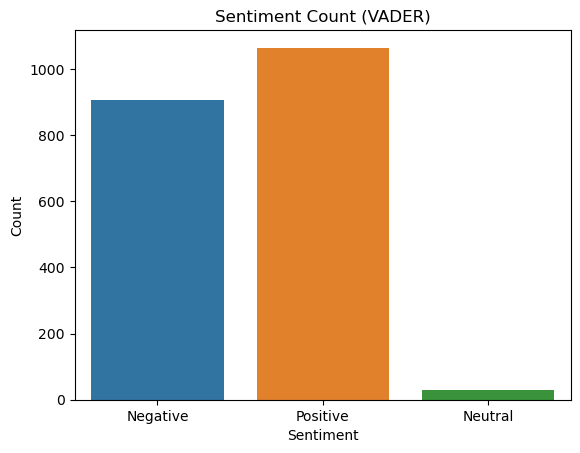

In [105]:
sns.countplot(data=data,x=data.sentiment)
plt.title("Sentiment Count (VADER)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

**Sentiment Analysis using VADER** suggests that there are mostly positive reviews regarding the airlines.

In [106]:
data.sentiment.value_counts()

Positive    1064
Negative     906
Neutral       30
Name: sentiment, dtype: int64

In [107]:
sent = dict(data.sentiment.value_counts())
labels = list(sent.keys())
values = list(sent.values())

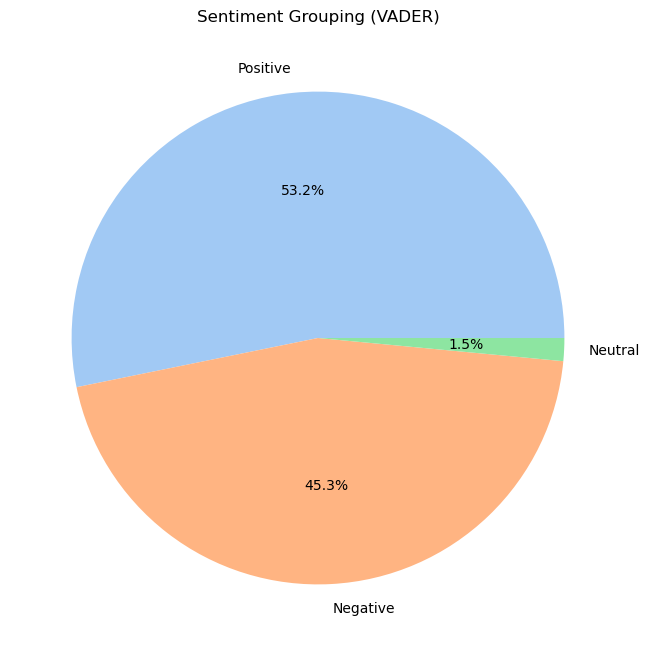

In [108]:
colors = sns.color_palette('pastel')[0:3]
plt.figure(figsize=(10,8))
plt.pie(values, labels = labels, colors = colors, autopct='%.1f%%')
plt.title("Sentiment Grouping (VADER)")
plt.show()

### Sentiment Analysis with textblob

In [109]:
#To Install - 
#!pip install textblob

In [110]:
from textblob import TextBlob

In [111]:
text = TextBlob('she is a good cook')
print(text.sentiment)

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)


In [112]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def sentiment_analysis(data):
    data["Polarity"] = data["reviews"].apply(getPolarity)
    data["analysis"] = data["Polarity"].apply(getAnalysis)

def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [113]:
sentiment_analysis(data)

In [114]:
data.head()

,reviews,len,words,sentiment,Polarity,analysis
0,I booked our first out of country trip to ta...,2504,464,Negative,-0.022475,Negative
1,My husband and I booked seats within our prem...,473,89,Negative,-0.112500,Negative
2,"May 3, flew from Seattle to Heathrow then to...",854,145,Negative,-0.200000,Negative
3,I went through three flights to reach my dest...,1193,215,Negative,0.030000,Positive
4,An excellent flight in Club World on British ...,595,101,Positive,0.566071,Positive


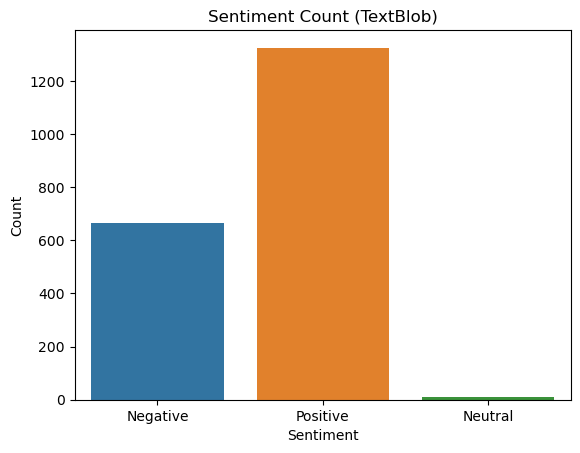

In [115]:
sns.countplot(data=data,x=data.analysis)
plt.title("Sentiment Count (TextBlob)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

**Sentiment Analysis using TextBlob** suggests that there are mostly positive reviews regarding the airlines.\
In comparison with VADER, TextBlob classfied many views as positive.

In [116]:
data.analysis.value_counts()

Positive    1325
Negative     665
Neutral       10
Name: analysis, dtype: int64

In [117]:
sent_ = dict(data.analysis.value_counts())
labels_ = list(sent_.keys())
values_ = list(sent_.values())

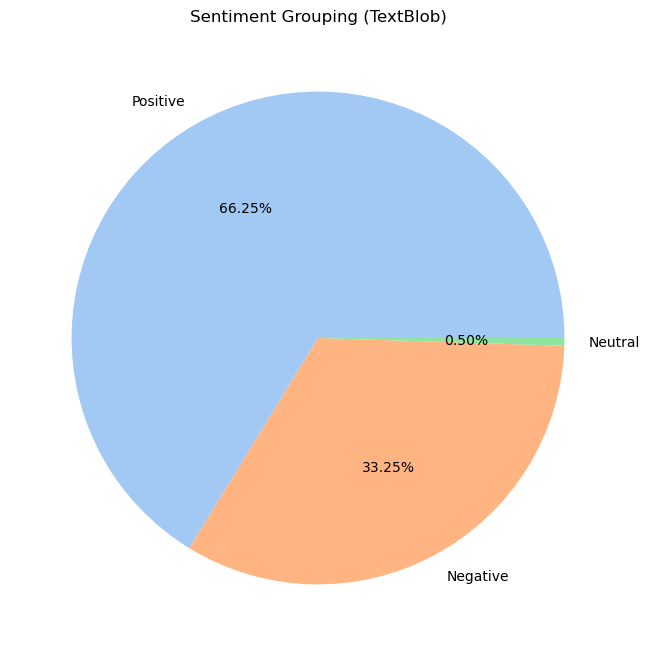

In [118]:
colors = sns.color_palette('pastel')[0:3]
plt.figure(figsize=(10,8))
plt.pie(values_, labels = labels_, colors = colors, autopct='%.2f%%')
plt.title("Sentiment Grouping (TextBlob)")
plt.show()

- 66.25% reviews are positive compared 53.2% in VADER

### Finding Most Common Words

Converting all the reviews to lowercase.

In [119]:
data.reviews = data.reviews.apply(lambda x:x.lower())

In [120]:
def preprocess(text):
    
    # adding a few extra stopwords
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', "i'm",
                    'im', 'dont', 'doin', 'ure',"is" "all","on","ba",
                    "january","february","march","april","may","june","july",
                    "august","september","october","november","december",
                "sunday","monday","tuesday","wednesday","thursday","friday",
                "saturday","week","day","daily","month","year","flight","gate",
                "airways","british","take","off","arrive","depart","departure",
                "phone","call","seattle","heathrow","edinburgh","monaco","us","hour",
                "odd","even","minute","flights","hours","gave","thats","that's",
                "haven't","didnt","didn't","don't","can't","airport","france",
                "london","england","land","landing","air","gate","seat","check","ife",
                "ok","mins"]
    
    text = text.lower()
    
    # remove the digits and dots.
    text = re.sub("\d+", "", text)
    text = re.sub("[.]+", "", text)
    
    # remove punctuations
    nopunc = [char for char in text if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    # remove stopwords
    nopunc = [word for word in nopunc.split() if word not in STOPWORDS]

    nopunc = ' '.join(nopunc)
    
    return ' '.join([word.lower() for word in nopunc.split() if word.lower() not in STOPWORDS])

In [121]:
data["clean_review"] = data.reviews.apply(lambda x:x.lower())
data["clean_review"] = data.clean_review.apply(preprocess)

In [122]:
data.head()

,reviews,len,words,sentiment,Polarity,analysis,clean_review
0,i booked our first out of country trip to ta...,2504,464,Negative,-0.022475,Negative,booked first country trip husband surprise tri...
1,my husband and i booked seats within our prem...,473,89,Negative,-0.112500,Negative,husband booked seats within premium economy bo...
2,"may 3, flew from seattle to heathrow then to...",854,145,Negative,-0.200000,Negative,flew lost golf bag caused purchase golf shoes ...
3,i went through three flights to reach my dest...,1193,215,Negative,0.030000,Positive,went three reach destination without exception...
4,an excellent flight in club world on british ...,595,101,Positive,0.566071,Positive,excellent club world welcome aboard warm conti...


In [123]:
from collections import Counter

words = data.clean_review.apply(lambda x: [word.lower() for word in x.split()])
count_words = Counter()

for word in words:
    count_words.update(word)
    
print(count_words.most_common(50))

[('service', 1625), ('food', 1225), ('crew', 1142), ('time', 1084), ('class', 1016), ('cabin', 1016), ('seats', 1000), ('good', 960), ('one', 926), ('business', 870), ('staff', 860), ('would', 835), ('get', 768), ('economy', 724), ('airline', 691), ('first', 637), ('back', 586), ('plane', 562), ('boarding', 561), ('passengers', 553), ('could', 541), ('lounge', 507), ('experience', 502), ('return', 498), ('told', 487), ('meal', 479), ('club', 478), ('fly', 468), ('aircraft', 465), ('customer', 459), ('new', 450), ('like', 442), ('airlines', 421), ('premium', 400), ('well', 391), ('really', 385), ('drinks', 385), ('long', 384), ('got', 380), ('offered', 376), ('minutes', 376), ('two', 375), ('flying', 368), ('another', 363), ('also', 363), ('poor', 355), ('better', 348), ('much', 338), ('still', 337), ('luggage', 337)]


#### Most common 20 words

In [124]:
for word,count in count_words.most_common(20):
    print(word)

service
food
crew
time
class
cabin
seats
good
one
business
staff
would
get
economy
airline
first
back
plane
boarding
passengers


### Topic Modeling

It means to assign topics to unlabeled text documents.\
We use **Latent Dirichlet Allocation** (LDA) which helps us classify the text in a review to a particular topic.


In [125]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english',
                       max_df = .1,
                       max_features = 5000)

X = count.fit_transform(data.clean_review.values)

In [126]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10,
                               random_state = 123,
                               learning_method = 'batch')
X_topics = lda.fit_transform(X)

In [127]:
lda.components_.shape

(10, 5000)

In [128]:
n_top_words = 5
feature_names = count.get_feature_names_out()
print("TOPICS - \n")
for topic_idx, topic in enumerate(lda.components_):
    print(f'{topic_idx + 1} :',' '.join([feature_names[i]
                  for i in topic.argsort()[:-n_top_words -1:-1]]))

TOPICS - 

1 : times travel ask went bag
2 : dinner tea wine coffee inflight
3 : quite product best bit little
4 : bag refund baggage ticket booking
5 : lhr cape town cancelled said
6 : short haul europe budget free
7 : excellent aisle main efficient fine
8 : screen bad space quality sleep
9 : ticket leg travel extra row
10 : cancelled days checkin tickets help


### Negative Review Analaysis

In [129]:
negative = data[data.analysis == 'Negative']

In [130]:
negative.shape

(665, 7)

In [131]:
negative.head()

,reviews,len,words,sentiment,Polarity,analysis,clean_review
0,i booked our first out of country trip to ta...,2504,464,Negative,-0.022475,Negative,booked first country trip husband surprise tri...
1,my husband and i booked seats within our prem...,473,89,Negative,-0.112500,Negative,husband booked seats within premium economy bo...
2,"may 3, flew from seattle to heathrow then to...",854,145,Negative,-0.200000,Negative,flew lost golf bag caused purchase golf shoes ...
5,the flight schedule was delayed for one hour....,594,104,Negative,-0.215714,Negative,schedule delayed one boarding plane delayed le...
6,the worst experience in all my years of trave...,450,79,Negative,-0.083333,Negative,worst experience years travel first two kids b...


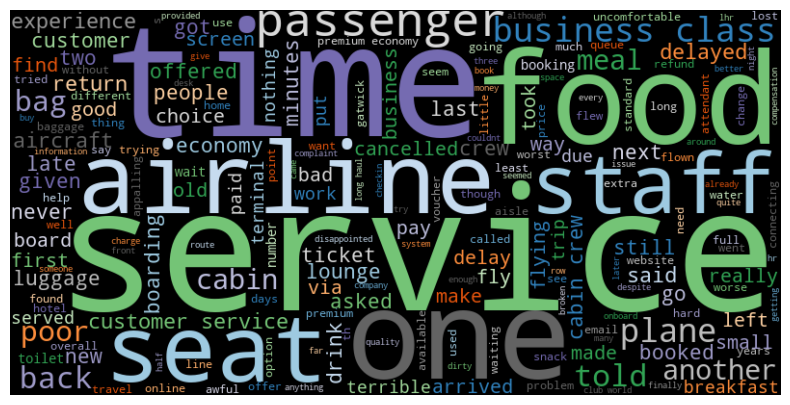

In [132]:
wordcloud = WordCloud(background_color='black',
                      colormap='tab20c',font_path=None,width=800,
                      height=400).generate(''.join(negative.clean_review))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Most common negative review words

In [133]:
from collections import Counter

words = negative.clean_review.apply(lambda x: [word.lower() for word in x.split()])
count_words = Counter()

for word in words:
    count_words.update(word)
    
print(count_words.most_common(50))

[('service', 489), ('food', 358), ('class', 336), ('business', 310), ('one', 306), ('seats', 301), ('staff', 295), ('time', 269), ('cabin', 268), ('airline', 266), ('would', 246), ('crew', 238), ('get', 231), ('economy', 220), ('customer', 199), ('passengers', 196), ('back', 194), ('plane', 190), ('poor', 185), ('told', 183), ('could', 173), ('return', 157), ('another', 154), ('experience', 153), ('meal', 146), ('boarding', 144), ('luggage', 141), ('never', 138), ('delayed', 138), ('aircraft', 137), ('first', 134), ('like', 132), ('premium', 130), ('airlines', 130), ('worst', 129), ('said', 121), ('booked', 119), ('offered', 118), ('late', 116), ('bag', 115), ('club', 115), ('also', 115), ('due', 115), ('two', 114), ('fly', 114), ('asked', 114), ('minutes', 112), ('people', 111), ('long', 109), ('last', 109)]


In [134]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english',
                       max_df = .1,
                       max_features = 3000)

X_neg = count.fit_transform(negative.clean_review.values)

from sklearn.decomposition import LatentDirichletAllocation

lda_neg = LatentDirichletAllocation(n_components = 10,
                               random_state = 63,
                               learning_method = 'batch')
X_neg_topics = lda_neg.fit_transform(X_neg)
neg_top = []
n_top_words = 4
feature_names = count.get_feature_names_out()
print("TOPICS - \n")
for topic_idx, topic in enumerate(lda_neg.components_):
    print(' '.join([feature_names[i]
                  for i in topic.argsort()[:-n_top_words -1:-1]]))
    neg_top.append(' '.join([feature_names[i]
                  for i in topic.argsort()[:-n_top_words -1:-1]]))


TOPICS - 

screen choice meals want
drinks bag easyjet free
lounge work worse drink
terminal money appalling lounge
days refund number voucher
row leg lounge booking
bag bags checkin baggage
lounge trip selection aisle
suitcase th sent baggage
planes budget lounge quality


#### Negative Topic Wordcloud

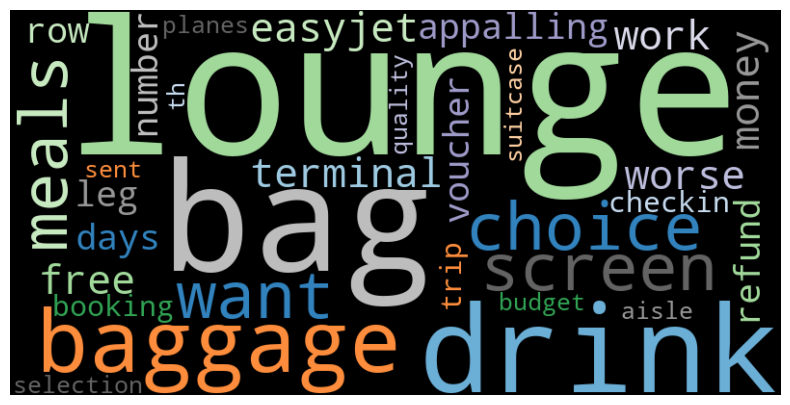

In [135]:
wordcloud = WordCloud(background_color='black',
                      colormap='tab20c',font_path=None,width=800,
                      height=400).generate(' '.join(neg_top))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Positive Review Analysis

In [136]:
positive = data[data.analysis == 'Positive']

In [137]:
positive.shape

(1325, 7)

In [138]:
positive.head()

,reviews,len,words,sentiment,Polarity,analysis,clean_review
3,i went through three flights to reach my dest...,1193,215,Negative,0.030000,Positive,went three reach destination without exception...
4,an excellent flight in club world on british ...,595,101,Positive,0.566071,Positive,excellent club world welcome aboard warm conti...
12,busy day at lhr and flight full. lounge crow...,324,52,Positive,0.323939,Positive,busy lhr full lounge crowded b gates lounge qu...
13,worst seats i have ever encountered in econom...,532,100,Negative,0.071429,Positive,worst seats ever encountered economy class leg...
14,top ten reasons to not use british airways to...,2286,435,Negative,0.047209,Positive,top ten reasons use aware notice travel risk t...


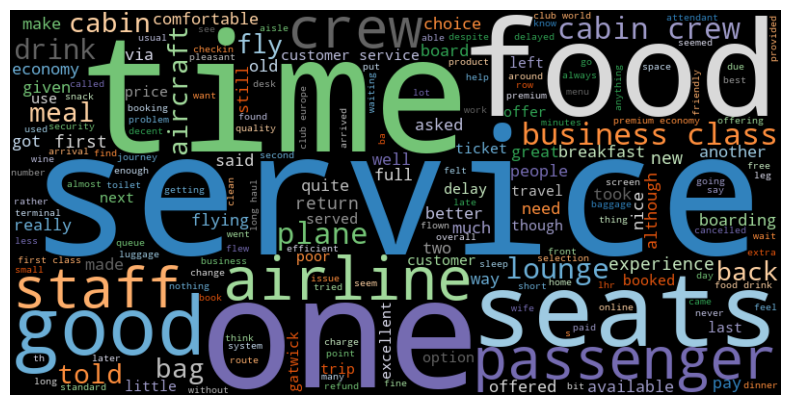

In [139]:
wordcloud = WordCloud(background_color='black',
                      colormap='tab20c',font_path=None,width=800,
                      height=400).generate(''.join(positive.clean_review))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Most common positive review words

In [140]:
from collections import Counter

words = positive.clean_review.apply(lambda x: [word.lower() for word in x.split()])
count_words = Counter()

for word in words:
    count_words.update(word)
    
print(count_words.most_common(50))

[('service', 1133), ('crew', 904), ('good', 868), ('food', 865), ('time', 815), ('cabin', 748), ('seats', 696), ('class', 680), ('one', 614), ('would', 588), ('staff', 561), ('business', 560), ('get', 535), ('economy', 504), ('first', 503), ('airline', 424), ('boarding', 417), ('lounge', 407), ('back', 392), ('plane', 372), ('could', 368), ('club', 363), ('passengers', 356), ('fly', 354), ('experience', 349), ('new', 344), ('return', 341), ('well', 333), ('meal', 333), ('aircraft', 327), ('drinks', 312), ('like', 309), ('told', 304), ('really', 293), ('airlines', 291), ('better', 284), ('great', 283), ('friendly', 275), ('long', 275), ('flying', 274), ('got', 272), ('premium', 270), ('nice', 265), ('minutes', 264), ('two', 260), ('much', 260), ('offered', 258), ('customer', 257), ('made', 254), ('full', 251)]


In [141]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english',
                       max_df = .1,
                       max_features = 3000)

X_pos = count.fit_transform(positive.clean_review.values)

from sklearn.decomposition import LatentDirichletAllocation

lda_pos = LatentDirichletAllocation(n_components = 10,
                               random_state = 63,
                               learning_method = 'batch')
X_pos_topics = lda_pos.fit_transform(X_pos)
pos_top = []
n_top_words = 4
feature_names = count.get_feature_names_out()
print("TOPICS - \n")
for topic_idx, topic in enumerate(lda_pos.components_):
    print(' '.join([feature_names[i]
                  for i in topic.argsort()[:-n_top_words -1:-1]]))
    pos_top.append(' '.join([feature_names[i]
                  for i in topic.argsort()[:-n_top_words -1:-1]]))


TOPICS - 

st wife europe said
refund travel cancelled bag
covid bus money departed
free terminal onboard low
luggage delayed delay baggage
early bag morning delay
deck bas checkin professional
fast europe options tea
screen product sleep selection
dinner hot boeing wine


#### Positive Topic Wordcloud

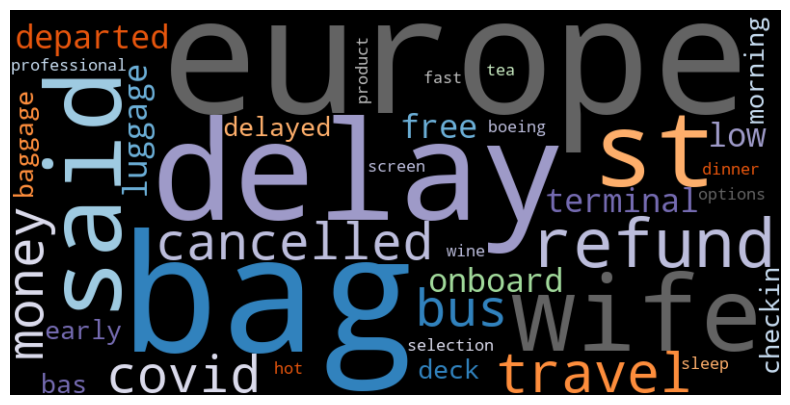

In [142]:
wordcloud = WordCloud(background_color='black',
                      colormap='tab20c',font_path=None,width=800,
                      height=400).generate(' '.join(pos_top))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Please feel free to let me know where I can improve and give your suggestions.
Thankyou for reading through!